In [1]:
import numpy as np

In [2]:
class Node:
         
    def __init__(self, initial, parent=None, acao=None, custo=0):

        self.initial = initial
    
    def __repr__(self):
        return "<Node {}>".format(self.initial)

    def expandir(self, problema, rainha=None):

        if rainha == None:
            rainha_list = self.encontrar_rainha()
            sorteio = np.random.choice(range(len(rainha_list)))
            rainha = rainha_list[sorteio]
        
        return [self.child_node(problema, rainha, acao) 
                for acao in problema.pos_mov(self.initial)]
        

    def child_node(self, problem, rainha, acao):

        prox_estado = problem.jogada(self.initial, rainha, acao)

        prox_node = Node(prox_estado, self, acao, 0)

        return prox_node
    
    def encontrar_rainha(self):

        coordenadas = []
        fil = len(self.initial)
        col = len(self.initial[:1][0])
        for i in range(fil):
            for j in range(col):
                if self.initial[i][j] == 1:
                    coordenadas.append([i,j])
              
        return coordenadas

In [3]:
class oitorainhas:

    def __init__(self, x, y, tabuleiro=None):
        self.x = x
        self.y = y

        if tabuleiro == None:
            self.tabuleiro = np.zeros([x,y])
            rainhas = 0
            while True:

                xx =  np.random.randint(self.x)
                yy =  np.random.randint(self.y)

                if self.tabuleiro[xx][yy] != 1:
                    self.tabuleiro[xx][yy] = 1
                    rainhas+=1
                    
                if rainhas ==  self.x:
                    break
                

    def pos_mov(self, tabuleiro):

        pos = []
        for i in range(self.x):
            for j in range(self.y):
                if tabuleiro[i][j] != 1:
                    pos.append([i,j])
        
        return pos

    def jogada(self, tabuleiro, rainha, coordenada):

        tab = tabuleiro.copy()

        tab[rainha[0],rainha[1]] = 0
        tab[coordenada[0],coordenada[1]] = 1

        return tab
    
    def test_objetivo(self, tabuleiro):

        invalido = 0

        for icol in range(self.y):

            for irow in range(self.x):
    
    
                if(tabuleiro[irow][icol] == 1):
               

                    # Contar 1s na coluna icol
                    for k in range(self.y):
                        if (tabuleiro[irow][k] == 1 and [irow, icol]!=[irow, k]):
                            invalido+=1

                    # Contar 1s na fileira irow
                    for k in range(self.x):
                        if (tabuleiro[k][icol] == 1 and [irow, icol]!=[k, icol]):
                            invalido+=1

                    # encontrar diagonal esquerda (secundaria)
                    col_esq = icol
                    row_esq = irow
                    while(col_esq != 0 and row_esq != (self.x-1)):
                        col_esq-=1
                        row_esq+=1       

                    # cencontrar diagonal direita (primaria)
                    col_dir = icol
                    row_dir = irow
                    while(col_dir != (self.y-1) and row_dir != (self.x-1)):
                        col_dir+=1
                        row_dir+=1

                    # contar 1's diagonal esquerda (secundaria)
                    while(row_esq >= 0 and col_esq <= self.y-1):

                        if (tabuleiro[row_esq][col_esq] == 1 and [irow, icol]!=[row_esq, col_esq]):
                            invalido+=1

                        col_esq+=1
                        row_esq-=1

                    # contar 1's diagonal direita (primaria)
                    while(col_dir>=0 and row_dir>=0):

                        if (tabuleiro[row_dir][col_dir] == 1 and [irow, icol]!=[row_dir, col_dir]):
                            invalido+=1
                            
                        col_dir-=1
                        row_dir-=1
       
        if invalido == 0:
            return True
        else:
            return False

Será feito um algoritmo de busca em largura (utilizado anteriormente para buscar caminhos) que irá buscar resolver o desafio das rainhas. Esse tipo de algoritmo para esse tipo de problema é ruim, já que o desafio não pede uma descrição de rotas podemos utilizar soluções que não se preocupam com isso e portanto utilizam menos memória e por não gerenciar muitos estados podem progredir mais rapidamente.

In [4]:
def Busca_largura(prob):

    # Lista que irá manter os estados 
    frontier = [Node(prob.tabuleiro)]

    # Verificar se o primeiro estado é o objetivo
    if prob.test_objetivo(frontier[0].initial):
            return frontier[0]
    
    while frontier:

        '''Selecionar o sempre o primeiro estado
        da lista, ou seja, sempre os mais rasos''' 
        no = frontier[0]

        # Novos estados derivados do nó selecionado
        filhos = no.expandir(prob)

        # Loop por cada um dos estados recém criados
        for filho in filhos:

            # Flag identificando se não é um estado repetido
            unico = False
            
            '''Irá acontecer um loop por toda a lista de
            estados verificando se os que foram recém criados
            já estão na lista'''
            for i in range(len(frontier)):

                if filho != frontier[i]:
                    unico = True

            # Caso o estado não exista na lista
            if unico:
                # Será feito o teste se é o objetivo
                if prob.test_objetivo(filho.initial):

                    return filho
                # Será adicionado à lista
                frontier.append(filho)

        # Iremos remover o estado que gerou a expansão 
        frontier.remove(no)

Um ambiente até 5x5 é computável para esse algoritmo de busca em largura, mais do que isso o tempo passa a ser grande

In [5]:
desafio = oitorainhas(5,5)
desafio.tabuleiro

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [6]:
solucao = Busca_largura(desafio)
solucao.initial

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Agora com um algoritmo mais apropriado para o problema esperamos poder resolver problemas maiores que que apenas em uma matriz 5x5.
Na verdade 'subida de encosta' não é um algoritmo completo, ele irá funcionar:
 - com um estado de inicio será feito o teste objetivo e então iremos expandi-lo
 - Dentre os estados expandidos será selecionado o que melhor satisfaz uma determinada função (Em nosso caso queremos que a função diminua)
 - Caso dentre os estados recém formados nem um pode melhorar a função (diminuir em nosso caso) a busca será encerrado e o estado retornado, mesmo que não seja o objetivo (o objetivo teria a função igual à zero)

Perceba que será apenas a quantia do fator de ramificação do problema na memória (sendo um forma radical de lidar com a questão, podemos utilizar alguns algoritmos que utilizam memória de forma limitada para acelerar a busca), e o motivo de não ser completo está no item 3

In [7]:
'''Função heurística utilizada para auxiliar 
o algoritmo 'subida de encosta'. Ela irá retornar 
a quantia de ataques entre as rainhas estão acontecendo
buscando então selecionar os estados que diminuam essa função'''

def h_eliminacoes(tabuleiro):

        x = tabuleiro.shape[0]
        y = tabuleiro.shape[1]

        invalido = 0

        for icol in range(y):

            for irow in range(x):
    
                if(tabuleiro[irow][icol] == 1):
        
                    # Contar 1s na coluna icol
                    for k in range(y):
                        if (tabuleiro[irow][k] == 1 and [irow, icol]!=[irow, k]):                   
                            invalido+=1

                    # Contar 1s na fileira irow
                    for k in range(x):

                        if (tabuleiro[k][icol] == 1 and [irow, icol]!=[k, icol]):
                            invalido+=1

                    # encontrar diagonal esquerda (secundaria)
                    col_esq = icol
                    row_esq = irow
                    while(col_esq != 0 and row_esq != (x-1)):

                        col_esq-=1
                        row_esq+=1       

                    # cencontrar diagonal direita (primaria)
                    col_dir = icol
                    row_dir = irow
                    while(col_dir != (y-1) and row_dir != (x-1)):

                        col_dir+=1
                        row_dir+=1

                    # contar 1's diagonal esquerda (secundaria)
                    while(row_esq >= 0 and col_esq <= y-1):

                        if (tabuleiro[row_esq][col_esq] == 1 and [irow, icol]!=[row_esq, col_esq]):
                            invalido+=1

                        col_esq+=1
                        row_esq-=1

                    # contar 1's diagonal direita (primaria)
                    while(col_dir>=0 and row_dir>=0 and [irow, icol]!=[row_dir, col_dir]):

                        if (tabuleiro[row_dir][col_dir] == 1):
                            invalido+=1
                            
                        col_dir-=1
                        row_dir-=1

        return invalido

In [8]:
def Subida_Encosta(prob, func):

    # Estado que iremos manipular
    no = Node(prob.tabuleiro)

    # Testar se é o objetivo
    if prob.test_objetivo(no.initial):
        return no

    while True:

        # Expansão do estado selecionado
        filhos = no.expandir(prob)

        # Inicializar a variável filho
        filho = no
        '''Loop pelos estados expandidos
        selecionando o que melhor satisfaz 
        a função'''
        for i in filhos:
            if func(i.initial) < func(no.initial):
                filho = i
            
        # Caso não haja estados que melhores a função, encerram as buscas
        if func(filho.initial) == func(no.initial):    
            break

        no = filho

    print('O objetivo foi cumprido: ', prob.test_objetivo(no.initial))
    
    
    return no

'''Variação da subida de encosta em que é permitido um limite "lim_passos"
de passos que não irão melhorar a função (nem piora-la), mantendo ela igual
apenas mudando o estado na tentativa de sair de uma região linear (em questão à função)'''
def Subida_Passos(prob, func, lim_passos=30):

    no = Node(prob.tabuleiro)

    passo=0
    while True:

        filhos = no.expandir(prob)
        n=0
    
        for filho in filhos:

            '''Será comparado se há um próximo estado melhor que atual,
            se houver a contagem dos passos será zerada'''
            if func(filho.initial) < func(no.initial):
                passo = 0
                no = filho
                n+=1

            # Retornar caso o estado atual seja o objetivo
            elif func(no.initial) == 0:
                return no

            # Poderá haver passos ao lado contando que o limite  de passos não tenha sido excedido       
            elif func(filho.initial) == func(no.initial) and passo <= lim_passos:
                passo+=1
                no = filho
                n+=1

            # Caso já tenha ultrapassado o limite de passos para o lado será retornado o estado
            elif passo > lim_passos:
                return no
            
        # Caso já tenha ultrapassado o limite de passos para o lado será cancelado o loop while
        if passo > lim_passos:
            break

        '''Essa condição é para sair da situação de não haver mais passos para o
        lado (já esteja em um topo um mínima sem ter atingido o  objetivo), avanços em
        direção do objetivo e o limite de passos não tenha sido alcançado assim será cancelado
        o while (caso contrário ficaria preso no loop)'''
        if n == 0:
            break
    
    return no


'''Basicamente os estado que sejam melhor ou igual ao 
atual serão escolhidos de forma aleatória'''
def Subida_Estocastica(prob, func):

    no = Node(prob.tabuleiro)

    while True:

        filhos = no.expandir(prob)

        selecionados = []

        # loop para selecionar os estados 
        for filho in filhos:
        
            if func(filho.initial) <= func(no.initial):
                selecionados.append(filho)

        # se a lista for vazia retorna o estado atual
        if selecionados == []:
            return no
        # caso contrário escolher um estado aleatoriamente
        else:
            no = np.random.choice(selecionados)

        if func(no.initial) == 0:
            return no   

'''É o único modelo de subida de encosta mostrado até
agora que seja completo, ele irá escolher sempre o estado
que melhore a função, caso não haja mais ele irá gerar
um novo tabuleiro e tentar resolve-lo até que o objetiva seja
cumprido'''
def Subida_Reinicio(prob, func):

    no = Node(prob.tabuleiro)
 
    while True:

        filhos = no.expandir(prob)

        # flag para sabermos se houve avanço
        n = 0
        
        '''Irá testar todos os estados gerados, caso não
        haja melhora haverá um reinicio executado na última
        condicional'''
        for filho in filhos:
            if func(filho.initial) < func(no.initial):
                n+=1
                no = filho

        if func(no.initial) == 0:
            return no
        
        # Se não houve evolução é reiniciado o problema
        elif n == 0:
            no = Node(oitorainhas(8, 8).tabuleiro)  

In [9]:
desafio = oitorainhas(8,8)
print(desafio.tabuleiro)

[[0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]


Subida de Encosta

In [10]:
solucao = Subida_Encosta(desafio, h_eliminacoes)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

O objetivo foi cumprido:  False
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]]

Iniciado com: 11 conflitos
Depois da resolução: 5 conflitos


Subida de Encosta permitindo passos ao lado

In [11]:
solucao = Subida_Passos(desafio, h_eliminacoes)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Iniciado com: 11 conflitos
Depois da resolução: 3 conflitos


Subida de Encosta selecionando os melhores estados de forma aleatória

In [12]:
solucao = Subida_Estocastica(desafio, h_eliminacoes)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

[[0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Iniciado com: 11 conflitos
Depois da resolução: 4 conflitos


Subida de Encosta com reinícios 

In [13]:
solucao = Subida_Reinicio(desafio, h_eliminacoes)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Iniciado com: 11 conflitos
Depois da resolução: 0 conflitos


Esse algoritmo irá combinar além da busca por melhores estados a possibilidade de movimentos piores (isso para evitar ficar preso em máximas ou mínimas locais). 
- O loop é iniciado com temp. Ele irá decidir a probabilidade de aceirarmos um movimento que piora a função, seu calculo é feito com init_temp: uma temperatura que desejamos começar, col: seria o coeficiente de resfriamento, (iteracao*col) aumenta conforme ocorrem loops diminuindo temp e a probabilidade de aceitar estados que pioram a função
- Ao expandir o estado atual 'no' serão colocados na lista 'filhos'
- Na lista filho um será selecionado um estado de forma completamente aleatória
- 'Energia' irá conter caso o estado melhorou ou se piorou teremos uma métrica de quanto foi
- No primeiro case:
    - Se o novo estado é melhor (energia >0) ele será aceito
    - Se não for melhor será aceito por sorte, sendo determinado por temp e quão ruim foi o novo estado isso deverá ser maior que um valor aleatório de 0 à 1

In [14]:
def Simulated_annealing(prob, func, init_temp=10, col=0.005):

    no = Node(prob.tabuleiro)
    iteracao = 1
    while True:

        temp = init_temp / (iteracao * col)

        if temp <= 0.1 :

            return no

        filhos = no.expandir(prob)
        prox_no = np.random.choice(filhos)
       
        energia = func(no.initial) - func(prox_no.initial)
        
        if energia > 0 or np.exp(energia / temp) > np.random.uniform(0.0, 1.0):
            no = prox_no
        
        if func(no.initial) == 0:
         
            return no
        
        iteracao+=1

In [15]:
solucao = Simulated_annealing(desafio, h_eliminacoes)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Iniciado com: 11 conflitos
Depois da resolução: 1 conflitos


Algoritmo Feixe Local irá fazer maior uso de memória, já que os vistos até agora vão ao extremo usa-la de forma mínima, com esse uso adicional espera-se ter melhores resultados em relação a tempo até encontrar uma solução. Sendo esse um algoritmo completo
- Será iniciado com uma lista 'no_list' mantendo k estados
- Cada um dos k estados serão expandidos e os alocando em 'list_filho'
- Da lista 'list_filho' será passado os k melhores estados em relação à função para a lista 'no_list'
- E assim o algoritmo segue até encontrar a solução

In [16]:
def insertionSort(lista):
 
    for i in range(1, len(lista)):
 
        item = lista[i]
 
        j = i-1
        while j >= 0 and h_eliminacoes(item.initial) > h_eliminacoes(lista[j].initial):
                lista[j + 1] = lista[j]
                j -= 1
        lista[j + 1] = item


def Feixe_Local(prob, func,  sort, k=50):

    no_list = []
    list_filho = []
    
    for i in range(k):
        no = Node(prob.tabuleiro)
        no_list.append(no)

    sort(no_list)
    
    if prob.test_objetivo(no_list[-1].initial) == True:
        return no
    
    while True:

        for no in no_list:
            list_filho.extend(no.expandir(prob))

        for i in range(len(list_filho)):
            
            if func(list_filho[i].initial) < func(no_list[0].initial):
                no_list.remove(no_list[0])
                no_list.append(list_filho[i])
                
        sort(no_list)

        if func(no_list[-1].initial) == 0:
                return no_list[-1]

In [17]:
solucao = Feixe_Local(desafio, h_eliminacoes, sort=insertionSort)
print(solucao.initial)

print(f'\nIniciado com: {h_eliminacoes(desafio.tabuleiro)} conflitos')
print(f'Depois da resolução: {h_eliminacoes(solucao.initial)} conflitos')

[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

Iniciado com: 11 conflitos
Depois da resolução: 0 conflitos


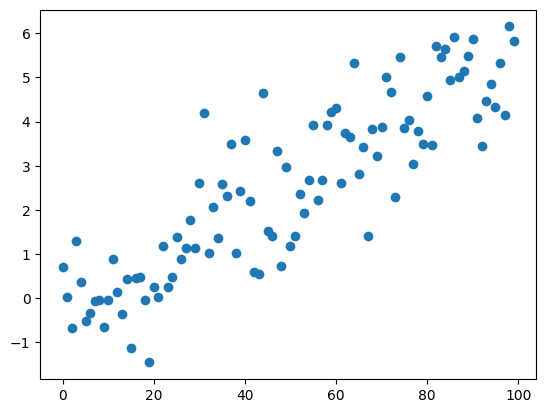

In [2]:
data = []
a = 0
for i in range(100):
    a+=0.05
    data.append(a + np.random.normal(0,1))

import matplotlib.pyplot as plt

plt.scatter(x=range(len(data)), y=data)